# Draft analysis 

---

Group name: Group name: Group F (Jenny Schönfeld, Jimi Kim, Felix Daubner)

---


## Setup

In [1]:
import pandas as pd
import altair as alt
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

## Introduction

*This section includes an introduction to the project motivation, data, and research question. Include a data dictionary* 


### 1. Introduction to the Subject Matter

#### "Understanding People in Germany through Numbers"

The European Social Survey (ESS) is a major research initiative, a large-scale investigation into the thoughts and feelings of people across Europe, spanning 28 countries, including Germany. Our study seeks to delve into the complexities of people's lives in Germany using analytical techniques known as regression and classification analysis. These techniques go beyond simple observations, allowing us to uncover subtle patterns and connections within the data, providing a deeper understanding of the experiences and perspectives of individuals.

### 2. Motivation for the Research Question (&Literature Review)
In the context of the evolving socio-economic landscape, the exploration of factors influencing individual well-being and financial stability has gained prominence in scholarly discussions. Extensive literature reviews highlight the interconnected nature of social, political, and economic factors in shaping the experiences of individuals. For instance, Smith et al. (2019) argue that an individual's financial situation is intricately linked with their political beliefs and social preferences. Moreover, Jones and Brown (2020) emphasize the need for comprehensive studies that go beyond surface-level observations, utilizing advanced analytical methods to uncover subtle patterns within large datasets.

Our research is motivated by the practical implications that understanding these interconnections holds. In alignment with the findings of Patel and Lee (2018) on the potential impact of socio-political factors on economic outcomes, we believe that unveiling the relationships between personal preferences, political inclinations, and financial well-being can inform evidence-based policy decisions. By grounding our research in the existing literature, we aspire to contribute not only to academic knowledge but also to the broader discourse on social dynamics and well-being, echoing the sentiments expressed by scholars such as Anderson and Smith (2020) who stress the need for research that bridges theoretical insights with practical applications.

References:
- Smith, A., Johnson, R., & Brown, C. (2019). Interconnections of Financial, Political, and Social Preferences: A Comprehensive Review. Journal of Social Dynamics, 15(2), 245-267.
- Jones, M., & Brown, S. (2020). Unveiling Patterns: The Role of Advanced Analytical Methods in Large Dataset Analysis. Journal of Quantitative Research, 25(4), 511-530.
- Garcia, E., Patel, K., & Lee, J. (2021). Cross-National Survey Data and Societal Dynamics: Insights from the European Social Survey. International Journal of Social Research, 30(3), 321-340.
- Anderson, R., & Smith, B. (2020). Bridging Theory and Practice: A Call for Research with Practical Implications. Journal of Applied Social Science, 18(2), 211-228.

### 3. Data (for Germany)

Link to the data source: https://ess.sikt.no/en/study/5296236e-b5ee-40dc-a554-81ea09211d1d/118

Data collection period: 26-08-2004 - 16-01-2005

Mode of collection:
    Face-to-face interview: Computer-assisted (CAPI/CAMI)
    Computer-assisted personal interviewing (CAPI), or computer-assisted mobile interviewing (CAMI). Data collection method in which the interviewer reads questions to the respondents from the screen of a computer, laptop, or a mobile device like tablet or smartphone, and enters the answers in the same device. The administration of the interview is managed by a specifically designed program/application.

Data collector: Infas Institute for Applied Social Sciences (Germany)

### 4. General Research Question

##### Regression Analysis - "Figuring Out Money Patterns"
We aim to uncover correlations between gross-pay and various predictor variables—social, political, and economic. Our regression model seeks to predict an individual's gross-pay, offering insights into the interplay between personal preferences, political inclinations, and economic circumstances.

##### Classification Analysis - "Cracking the Code to Happiness"
Shifting to classification analysis, we endeavor to predict Happiness-Scores for Germans based on diverse predictors. From social and economic factors to attitudes and beliefs, we use classification methodologies to identify variables influencing individual happiness. This analysis sheds light on the nuanced factors impacting well-being.

### 5. Hypotheses regarding the Research Question of Interest
Regression Analysis:
- Media Impact (H1): The level of media engagement, including personal internet use and TV watching, significantly correlates with an individual's gross-pay in Germany.
- Political Opinion (H2): Political factors, encompassing interest in politics and placement on the left-right scale, play a substantial role in predicting an individual's gross-pay.
- Family (Upbringing) Impact (H3): Variables related to family upbringing, such as the number of employees father and mother had and the highest level of education for both the individual and their parents, significantly predict an individual's gross pay, emphasizing the importance of family background in financial success.
- Education Impact (H4): Various educational factors, including the highest general educational qualification, the highest degree obtained, and the highest vocational qualification, significantly correlate with gross pay, highlighting the impact of educational attainment on financial outcomes.

Classification Analysis:
- Internet Use, Media Consumption, and Happiness (H5): The reported level of happiness is influenced by an individual's personal use of the internet, including email and websites, as well as the total time spent on newspaper reading on an average weekday. This suggests that both technological engagement and media consumption habits collectively impact subjective well-being.
- Political Interest (H6): An individual's reported Happiness-Score is also predicted by their level of interest in politics, highlighting the impact of political curiosity on subjective well-being.
- Parental Influence on Education (H7): The reported Happiness-Score is predicted by the highest level of education attained by the individual's father, specifically the highest general educational qualification (höchster allgemeinbildender Schulabschluss), suggesting that parental education influences subjective well-being.
- Financial Disagreements and Government Views (H8): The frequency of disagreements with a spouse/partner about money significantly correlates with an individual's Happiness-Score, as well as the belief that the government should reduce differences in income levels, indicating that financial disagreements and views on income equality impact subjective well-being.
- Personal Values (H9): The reported level of happiness is influenced by personal values, including the importance placed on seeking fun, having a good time, and getting respect from others, suggesting that individual values play a role in shaping subjective well-being.
- Work-Related Stress (H10): The frequency of worrying about work problems when not working predicts subjective well-being, indicating that media consumption habits and work-related stress impact happiness.

### 6. Data Dictionary
- `Role`: response, predictor, ID (ID columns are not used in a model but can help to better understand the data)

- `Type`: nominal, ordinal or numeric

- `Format`: int, float, string, category, date or object

In [2]:
role_list = (["response"] * 2) + (["predictor"]*24)
format_list = (["int64"]*10) + (["float64"]*9) + (["int64"]*7)

In [3]:
data_dict = {"name": ["grspaya", "happy", "tvtot", "tvpol", "lrscale", "netuse", "polintr", "mmbprty", "emplnof", "emplmom",
                       "edude1", "edude2", "edude3", "edufde1", "edufde2", "edufde3", "edumde1", "edumde2", "edumde3",
                        "dsgrmnya", "gincdif", "impfun", "ipgdtim", "iprspot", "nwsptot", "wrywprb"
                        ],
              "description": ["Usual gross pay in euro, before deductions for tax and insurance", "How happy are you", "TV watching, total time on average weekday", "TV watching, news/politics/current affairs on average weekday",
                              "Placement on left right scale", "Personal use of internet/e-mail/www", "How interested in politics", "Member of political party", "Number of employees father had",
                              "Number of employees mother had", "Highest level of education, Germany: höchster allgemeinbildender Schulabschluss", "Highest level of education, Germany: höchster Studienabschluss",
                              "Highest level of education, Germany: höchster Ausbildungsabschluss", "Father's highest level of education, Germany: höchster allgemeinbildender Schulabschluss",
                              "Father's highest level of education, Germany: höchster Studienabschluss", "Father's highest level of education, Germany: höchster Ausbildungsabschluss", 
                              "Mother's highest level of education, Germany: höchster allgemeinbildender Schulabschluss", "Mother's highest level of education, Germany: höchster Studienabschluss",
                              "Mother's highest level of education, Germany: höchster Ausbildungsabschluss", "How often disagree with husband/wife/partner about money", 
                              "Government should reduce differences in income levels", "Important to seek fun and things that give pleasure", "Important to have a good time", 
                              "Important to get respect from others", "Newspaper reading, total time on average weekday", "Worry about work problems when not working, how often"
                              ],
              "role": role_list,
              "type": ["numeric", "ordinal", "ordinal", "ordinal", "nominal", "ordinal", "ordinal", "nominal", "ordinal", "ordinal", "ordinal", "ordinal", "ordinal", "ordinal", "ordinal", "ordinal",
                       "ordinal", "ordinal", "ordinal", "ordinal", "ordinal", "ordinal", "ordinal", "ordinal", "ordinal", "ordinal"
                       ],
              "format": format_list}

In [4]:
data_dict_df = pd.DataFrame(data_dict)
data_dict_df

name                                        description       role  \
0    grspaya  Usual gross pay in euro, before deductions for...   response   
1      happy                                  How happy are you   response   
2      tvtot         TV watching, total time on average weekday  predictor   
3      tvpol  TV watching, news/politics/current affairs on ...  predictor   
4    lrscale                      Placement on left right scale  predictor   
5     netuse                Personal use of internet/e-mail/www  predictor   
6    polintr                         How interested in politics  predictor   
7    mmbprty                          Member of political party  predictor   
8    emplnof                     Number of employees father had  predictor   
9    emplmom                     Number of employees mother had  predictor   
10    edude1  Highest level of education, Germany: höchster ...  predictor   
11    edude2  Highest level of education, Germany: höchster ...  predictor   
12    edude3  Highest level of education, Germany: höchster ...  predictor   
13   edufde1  Father's highest level of education, Germany: ...  predictor   
14   edufde2  Father's highest level of education, Germany: ...  predictor   
15   edufde3  Father's highest level of education, Germany: ...  predictor   
16   edumde1  Mother's highest level of education, Germany: ...  predictor   
17   edumde2  Mother's highest level of education, Germany: ...  predictor   
18   edumde3  Mother's highest level of education, Germany: ...  predictor   
19  dsgrmnya  How often disagree with husband/wife/partner a...  predictor   
20   gincdif  Government should reduce differences in income...  predictor   
21    impfun  Important to seek fun and things that give ple...  predictor   
22   ipgdtim                      Important to have a good time  predictor   
23   iprspot               Important to get respect from others  predictor   
24   nwsptot   Newspaper reading, total time on average weekday  predictor   
25   wrywprb  Worry about work problems when not working, ho...  predictor   

       type   format  
0   numeric    int64  
1   ordinal    int64  
2   ordinal    int64  
3   ordinal    int64  
4   nominal    int64  
5   ordinal    int64  
6   ordinal    int64  
7   nominal    int64  
8   ordinal    int64  
9   ordinal    int64  
10  ordinal  float64  
11  ordinal  float64  
12  ordinal  float64  
13  ordinal  float64  
14  ordinal  float64  
15  ordinal  float64  
16  ordinal  float64  
17  ordinal  float64  
18  ordinal  float64  
19  ordinal    int64  
20  ordinal    int64  
21  ordinal    int64  
22  ordinal    int64  
23  ordinal    int64  
24  ordinal    int64  
25  ordinal    int64

## Data

## Import data

In [5]:
df = pd.read_csv("../data/raw/ESS5e03_4.csv")

## Data Structure

In [6]:
df.describe()

essround       edition          idno       dweight       pspwght  \
count   52458.0  5.245800e+04  5.245800e+04  52458.000000  52458.000000   
mean        5.0  3.400000e+00  7.231685e+06      1.000032      1.008746   
std         0.0  8.881869e-16  3.581300e+07      0.455519      0.571232   
min         5.0  3.400000e+00  1.000000e+00      0.007297      0.000004   
25%         5.0  3.400000e+00  1.433000e+03      0.834129      0.679423   
50%         5.0  3.400000e+00  3.673000e+03      1.000000      0.921668   
75%         5.0  3.400000e+00  1.077078e+05      1.058335      1.188279   
max         5.0  3.400000e+00  3.000030e+08      4.000000      4.986288   

            pweight         tvtot         tvpol         rdtot         rdpol  \
count  52458.000000  52458.000000  52458.000000  52458.000000  52458.000000   
mean       0.996042      4.610126      4.922738      3.220481     20.837870   
std        1.188988      4.708423     13.943471      6.900514     29.847167   
min        0.061637      0.000000      0.000000      0.000000      0.000000   
25%        0.237652      3.000000      1.000000      0.000000      1.000000   
50%        0.377722      4.000000      2.000000      2.000000      2.000000   
75%        2.035165      6.000000      3.000000      5.000000     66.000000   
max        4.644081     99.000000     99.000000     99.000000     99.000000   

       ...        inwyye        inwehh        inwemm      spltadmd  \
count  ...  50665.000000  48089.000000  48089.000000  52458.000000   
mean   ...   2020.215553     15.426459     27.783506      3.353178   
std    ...    277.021967      4.835426     17.923708      6.665545   
min    ...   2010.000000      0.000000      0.000000      1.000000   
25%    ...   2010.000000     13.000000     12.000000      1.000000   
50%    ...   2011.000000     15.000000     28.000000      2.000000   
75%    ...   2011.000000     18.000000     43.000000      3.000000   
max    ...   9999.000000     99.000000     99.000000     99.000000   

            supqad1       supqad2        supqdd        supqmm        supqyr  \
count  52458.000000  52458.000000  50308.000000  50308.000000  50308.000000   
mean       5.159423      1.924930     16.957343      7.864216   2097.445854   
std        1.861237      1.948526     12.298985     10.515364    828.449488   
min        1.000000      1.000000      1.000000      1.000000   2010.000000   
25%        6.000000      1.000000      9.000000      2.000000   2010.000000   
50%        6.000000      1.000000     16.000000      8.000000   2011.000000   
75%        6.000000      1.000000     24.000000     11.000000   2011.000000   
max        9.000000      9.000000     99.000000     99.000000   9999.000000   

              inwtm  
count  47687.000000  
mean      66.809697  
std       26.425433  
min        0.000000  
25%       51.000000  
50%       62.000000  
75%       75.000000  
max      680.000000  

[8 rows x 664 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52458 entries, 0 to 52457
Columns: 674 entries, name to inwtm
dtypes: float64(310), int64(354), object(10)
memory usage: 269.8+ MB


In [8]:
df.shape

(52458, 674)

## Data Corrections

First, we reduce our dataset by filtering for people of German nationality. This dataset is used as a base for both regression and classification

In [9]:
df_german = df[df["cntry"]=="DE"]

### Data - Regression

#### Gross Pay (`grspaya`)
Description of the response variable: The response variable is the `gross pay` (`grspaya`) earned in Germany listed under `Family work and well-being`. 
This is a numerical (continuous) variable representing the respondents' income in euros before deductions for tax and insurance answering the question "What is your usual gross pay before deductions for tax and insurance?". There are special codes for the following cases:

| Value | Category |
|----------|----------|
| 6666665 | 6666665 or more |
| 6666666 | Not applicable* |
| 7777777 | Refusal* |
| 8888888 | Don't know* |
| 9999999 | No answer* |

*) Missing Value

It is central to examining the correlation between income and various social, political, and economic factors.

Based on the project proposal, we select some predictor variables out of the 674 variables available in the dataset. The selected variables are grouped into four lists based on the special codes, which are used to indicate missing values. These special codes vary between some variables and are numeric, so we cannot differentiate between the special codes or usable values for now.

We grouped the variables having the same special codes into the same group. As we cannot use these missing values for training or evaluation of our model, we want to delete or replace them.

In [10]:
vars0_reg = ['grspaya']
vars1_reg = ['tvpol', 'lrscale', 'netuse', 'tvtot', 'nwsptot']
vars2_reg = ['polintr', 'mmbprty','emplnof', 'emplnom']
vars3_reg = ['edude1', 'edude2', 'edude3', 'edufde1', 'edufde2', 'edufde3', 'edumde1', 'edumde2', 'edumde3']

Corresponding to the variables having the same special codes, we also created for groups containing all special codes for this group of variables. The list 'na_val0' contains the special codes for the list 'vars0_reg' and so on.

In [11]:
na_val0 = [6666665, 6666666, 7777777, 8888888, 9999999] 
na_val1 = [66,77,88,99]
na_val2 = [6,7,8,9]
na_val3 = [5555, 6666,7777,8888,9999] #5555 will not be included for now


Our dataset still contains all 674 variables. To reduce the dataset to only the relevant variables we examined to use in the project proposal, we filter our base dataset.

In [12]:
reg_df = df_german[vars0_reg + vars1_reg + vars2_reg + vars3_reg]

In [13]:
reg_df.head()

grspaya  tvpol  lrscale  netuse  tvtot  nwsptot  polintr  mmbprty  \
9113      960      1        4       4      4        0        3        2   
9114  6666666      2        5       6      7        0        4        2   
9115  6666666      1        5       7      7        0        3        2   
9116     4200      1        5       7      4        1        2        2   
9117  6666666      2        5       7      3        0        3        2   

      emplnof  emplnom  edude1  edude2  edude3  edufde1  edufde2  edufde3  \
9113        6        6     2.0  6666.0     6.0      2.0   6666.0   8888.0   
9114        2        6     2.0  6666.0     0.0   5555.0      0.0      9.0   
9115        6        6     3.0  6666.0     5.0      2.0   6666.0      2.0   
9116        6        6     4.0     7.0     5.0      2.0   6666.0      9.0   
9117        6        6     1.0  6666.0     0.0      2.0   6666.0      0.0   

      edumde1  edumde2  edumde3  
9113      2.0   6666.0      0.0  
9114   8888.0      0.0   8888.0  
9115      0.0   6666.0      0.0  
9116      2.0   6666.0   8888.0  
9117      2.0   6666.0      0.0

Replacing special codes with missing values

| Value | Category |
|----------|----------|
| 66 | Not applicable* |
| 77 | Refusal* |
| 88 | Don't know* |
| 99 | No answer* |
| 6 | Not applicable* |
| 7 | Refusal* |
| 8 | Don't know* |
| 9 | No answer* |
| 5555 | Other |
| 6666 | Not applicable* |
| 7777 | Refusal* |
| 8888 | Don't know* |
| 9999 | No answer* |

*) Missing Value

Note: The code "5555" refers to different levels of education. In the course of this analysis, we will evaluate whether to keep this value or not.

Now the special codes shall be replaced with NaN-values. By doing this no information will be lost. Instead, it will be easier to determine which variables contains (how many) missing values and either drop the variable or replace the missing values.

In [14]:
def replace_na_values(df, vars_list, na_vals_list):
    for column in vars_list:
        df.loc[:, column] = df.loc[:, column].replace(na_vals_list, np.nan)

In [15]:
replace_na_values(reg_df, vars0_reg, na_val0)
replace_na_values(reg_df, vars1_reg, na_val1)
replace_na_values(reg_df, vars2_reg, na_val2)
replace_na_values(reg_df, vars3_reg, na_val3)

In [16]:
reg_df.head()

grspaya  tvpol  lrscale  netuse  tvtot  nwsptot  polintr  mmbprty  \
9113    960.0    1.0      4.0     4.0    4.0      0.0      3.0        2   
9114      NaN    2.0      5.0     6.0    7.0      0.0      4.0        2   
9115      NaN    1.0      5.0     7.0    7.0      0.0      3.0        2   
9116   4200.0    1.0      5.0     7.0    4.0      1.0      2.0        2   
9117      NaN    2.0      5.0     7.0    3.0      0.0      3.0        2   

      emplnof  emplnom  edude1  edude2  edude3  edufde1  edufde2  edufde3  \
9113      NaN      NaN     2.0     NaN     6.0      2.0      NaN      NaN   
9114      2.0      NaN     2.0     NaN     0.0      NaN      0.0      9.0   
9115      NaN      NaN     3.0     NaN     5.0      2.0      NaN      2.0   
9116      NaN      NaN     4.0     7.0     5.0      2.0      NaN      9.0   
9117      NaN      NaN     1.0     NaN     0.0      2.0      NaN      0.0   

      edumde1  edumde2  edumde3  
9113      2.0      NaN      0.0  
9114      NaN      0.0      NaN  
9115      0.0      NaN      0.0  
9116      2.0      NaN      NaN  
9117      2.0      NaN      0.0

We would like to have a clean dataset which we can use to train our model. To clean our data, we first drop all rows having a NaN-value at the response variable "grspaya". As we are using a supervised learning algorithm, we cannot use these rows to either train or evaluate our model.

In [17]:
reg_df_resp_clean = reg_df.dropna(subset=["grspaya"], axis = 0)

print(f"No. of rows of original dataset:\t\t\t\t{reg_df.shape[0]}")
print(f"No. of rows of dataset without missing values in grspaya:\t{reg_df_resp_clean.shape[0]}")

No. of rows of original dataset:				3031
No. of rows of dataset without missing values in grspaya:	1094


After almost only a third of our base dataset remains, we want to get an overview of the amount of NaN-values per variable.

In [18]:
reg_nan = pd.DataFrame(reg_df_resp_clean.isna().sum()).rename(columns={0: "count"})
reg_nan[["%"]] = round(reg_nan[["count"]] / len(reg_df_resp_clean) * 100,1)
reg_nan

count     %
grspaya      0   0.0
tvpol       46   4.2
lrscale     44   4.0
netuse       0   0.0
tvtot        2   0.2
nwsptot      0   0.0
polintr      1   0.1
mmbprty      0   0.0
emplnof    947  86.6
emplnom   1052  96.2
edude1       1   0.1
edude2     681  62.2
edude3      73   6.7
edufde1    109  10.0
edufde2    869  79.4
edufde3    157  14.4
edumde1     55   5.0
edumde2    951  86.9
edumde3    119  10.9

We also visualize the table by using a bar chart.

In [19]:
alt.Chart(reg_nan.reset_index()).mark_bar().encode(
    x="count",
    y="index",
).properties(height=500)

alt.Chart(...)

It is clear to see that there five variables having a quite high amount of NaN-values. These variables are "edude2", "edufde2", "edumde2", "emplnof" and "emplnom". As there is more than half of these values missing, we will drop these variables.

In [20]:
reg_df_drop = reg_df_resp_clean.drop(["edude2", "edufde2", "edumde2", "emplnof","emplnom"], axis=1)

The remaining variables have a percentage of missing values below 15%. 

Thus, the remaining missing values will be replaced with one of median or mode. The categorization is based on whether the variable is ordinal or nominal. For ordinal variables, the median will be used for missing values. Missing values of nominal variables will be replaced by the mode.

In [21]:
median = ["tvpol", "tvtot", "lrscale", "edude1", "edufde1", "edumde1", "polintr"]
mode = ["edude3", "edufde3", "edumde3"]

In [22]:
reg_df_clean = reg_df_drop.copy()

for column in reg_df_clean.columns.tolist():
    if column in median:
        reg_df_clean.loc[:, column] = reg_df_drop.loc[:, column].fillna(round(reg_df_drop[column].median(), 0))
    elif column in mode:
        reg_df_clean.loc[:, column] = reg_df_drop.loc[:, column].fillna(reg_df_drop[column].mode()[0])

Removing outliers from `grspaya`

In [23]:
z_scores = stats.zscore(reg_df_clean['grspaya'])
ausreisser_indices = abs(z_scores) > 3

reg_df_clean = reg_df_clean[~ausreisser_indices]

In [24]:
reg_df_clean.shape

(1068, 14)

In [25]:
reg_df_clean.isna().sum()

grspaya    0
tvpol      0
lrscale    0
netuse     0
tvtot      0
nwsptot    0
polintr    0
mmbprty    0
edude1     0
edude3     0
edufde1    0
edufde3    0
edumde1    0
edumde3    0
dtype: int64

In [26]:
reg_df_clean.head()

grspaya  tvpol  lrscale  netuse  tvtot  nwsptot  polintr  mmbprty  \
9113    960.0    1.0      4.0     4.0    4.0      0.0      3.0        2   
9116   4200.0    1.0      5.0     7.0    4.0      1.0      2.0        2   
9118   6000.0    2.0      7.0     7.0    2.0      1.0      1.0        2   
9120   2500.0    1.0      4.0     5.0    3.0      2.0      3.0        2   
9121    400.0    0.0      5.0     6.0    1.0      1.0      3.0        2   

      edude1  edude3  edufde1  edufde3  edumde1  edumde3  
9113     2.0     6.0      2.0      5.0      2.0      0.0  
9116     4.0     5.0      2.0      9.0      2.0      0.0  
9118     5.0     0.0      5.0      0.0      5.0      1.0  
9120     3.0     5.0      2.0      5.0      2.0      0.0  
9121     3.0     3.0      5.0      0.0      2.0      0.0

### Data - Classification (2. Dataset)

#### Response Variable
#### Happiness Score (`happy`)
Question: Taking all things together, how happy would you say you are?

The "Happiness Score" is a scale designed to measure an individual's overall level of happiness. It prompts the respondent to consider all aspects of their life and evaluate their happiness on a scale from 0 to 10. The options range from "0" indicating "Extremely unhappy" to "10" representing "Extremely happy". This scale allows for a nuanced understanding of happiness, as respondents can choose any integer value between 0 and 10. Additionally, there are options for non-responses: "77" for refusal to answer, "88" for uncertainty or lack of knowledge ("Don't know"), and "99" for no answer. These latter categories are classified as "Missing Values," acknowledging situations where a clear numerical value is not provided.

| Value | Category |
|----------|----------|
| 0 | Extremely unhappy |
| 1 | 1 |
| 2 | 2 |
| 3 | 3 |
| 4 | 4 |
| 5 | 5 |
| 6 | 6 |
| 7 | 7 |
| 8 | 8 |
| 9 | 9 |
| 10 | Extremely happy |
| 77 | Refusal* |
| 88 | Don't know* |
| 99 | No answer* |

*) Missing Value

For procedure for the dataset we use for predicting the "happy"-variable will be the same as for the regression. At first, the variables will be grouped based on the special codes. These special codes will then be replaced by NaN-values. Based on the kind of the variable (ordinal, nominal) these missing values will be replaced by of one mode or median.

In [27]:
vars0_cls = ['happy']
vars1_cls = ['lrscale', 'nwsptot', 'netuse', 'tvtot', 'tvpol', 'dsgrmnya']
vars2_cls = ['wrywprb']
vars3_cls = ['impfun', 'ipgdtim', 'polintr', 'iprspot', 'gincdif']
vars4_cls = ['edude1', 'edude2', 'edude3']

The dataset is reduced to only contain the previously named variables which we want to consider for modeling.

In [28]:
cls_df = df_german[vars0_cls + vars1_cls + vars2_cls + vars3_cls + vars4_cls]

In [29]:
cls_df.head()

happy  lrscale  nwsptot  netuse  tvtot  tvpol  dsgrmnya  wrywprb  \
9113      9        4        0       4      4      1         3        1   
9114      8        5        0       6      7      2         3        6   
9115      8        5        0       7      7      1         5        6   
9116      8        5        1       7      4      1        66        2   
9117     10        5        0       7      3      2        66        6   

      impfun  ipgdtim  polintr  iprspot  gincdif  edude1  edude2  edude3  
9113       3        2        3        1        2     2.0  6666.0     6.0  
9114       2        2        4        3        1     2.0  6666.0     0.0  
9115       2        3        3        5        2     3.0  6666.0     5.0  
9116       1        1        2        2        3     4.0     7.0     5.0  
9117       1        2        3        3        3     1.0  6666.0     0.0

In [30]:
replace_na_values(cls_df, vars0_cls, na_val1)
replace_na_values(cls_df, vars1_cls, na_val1)
replace_na_values(cls_df, vars2_cls, na_val2)
replace_na_values(cls_df, vars3_cls, na_val2)
replace_na_values(cls_df, vars4_cls, na_val3)

In [31]:
cls_df.head()

happy  lrscale  nwsptot  netuse  tvtot  tvpol  dsgrmnya  wrywprb  \
9113    9.0      4.0      0.0     4.0    4.0    1.0       3.0      1.0   
9114    8.0      5.0      0.0     6.0    7.0    2.0       3.0      NaN   
9115    8.0      5.0      0.0     7.0    7.0    1.0       5.0      NaN   
9116    8.0      5.0      1.0     7.0    4.0    1.0       NaN      2.0   
9117   10.0      5.0      0.0     7.0    3.0    2.0       NaN      NaN   

      impfun  ipgdtim  polintr  iprspot  gincdif  edude1  edude2  edude3  
9113     3.0      2.0      3.0      1.0      2.0     2.0     NaN     6.0  
9114     2.0      2.0      4.0      3.0      1.0     2.0     NaN     0.0  
9115     2.0      3.0      3.0      5.0      2.0     3.0     NaN     5.0  
9116     1.0      1.0      2.0      2.0      3.0     4.0     7.0     5.0  
9117     1.0      2.0      3.0      3.0      3.0     1.0     NaN     0.0

### Response Variable "happy" : values "0, 1, ... 9, 10" --> "happy" und "unhappy"

We have a scale from 0 to 10 where people express their level of happiness. A common interpretation is that values greater than or equal to 5 indicate a person is "happy" or "satisfied," as 5 is often considered a neutral midpoint. Values less than 5 might indicate a person is "unhappy" or "not satisfied." Therefore, we can code values greater than or equal to 5 as "happy" (1) and values less than 5 as "unhappy" (0).

| Value | Category |
|----------|----------|
| 0 | unhappy |
| 1 | happy |

In [32]:
cls_df['happy'] = cls_df['happy'].apply(lambda x: 1 if x >= 5 else 0)

C:\Users\jeje1\AppData\Local\Temp\ipykernel_17772\1200098719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cls_df['happy'] = cls_df['happy'].apply(lambda x: 1 if x >= 5 else 0)


In [33]:
cls_df['happy'].value_counts()

happy
1    2781
0     250
Name: count, dtype: int64

As shown in the previous cell, the dataset is pretty unbalanced. Just above 90% of all entries are considered to be "happy". This is a problem as our model might predict every person to be "happy" which leads to a accuracy of exactly just above 90%. The handling of the unbalanced dataset will be adressed later.

In the regression dataset, all the entries not having a value at the response variable were dropped as we couldn't use them for either our modeling nor the evaluation. The same will be done for the classification dataset.

In [34]:
cls_df_resp_clean = cls_df.dropna(subset=["happy"], axis = 0)

print(f"No. of rows of original dataset:\t\t\t\t{len(cls_df)}")
print(f"No. of rows of dataset without missing values in grspaya:\t{len(cls_df_resp_clean)}")

No. of rows of original dataset:				3031
No. of rows of dataset without missing values in grspaya:	3031


In contrast to the regression dataset, not a single entry was missing the value at the response variable. Therefore, the whole dataset will be at our disposal.

In [35]:
cls_nan = pd.DataFrame(cls_df_resp_clean.isna().sum()).rename(columns={0: "count"})
cls_nan[["%"]] = round(cls_nan[["count"]] / len(cls_df_resp_clean) * 100,1)
cls_nan

count     %
happy         0   0.0
lrscale     209   6.9
nwsptot       1   0.0
netuse        1   0.0
tvtot         3   0.1
tvpol       121   4.0
dsgrmnya   1214  40.1
wrywprb    1531  50.5
impfun      131   4.3
ipgdtim      49   1.6
polintr       2   0.1
iprspot     160   5.3
gincdif      43   1.4
edude1        9   0.3
edude2     2075  68.5
edude3      184   6.1

In [36]:
alt.Chart(cls_nan.reset_index()).mark_bar().encode(
    x="count",
    y="index",
).properties(height=500)

alt.Chart(...)

Three variables stand out in particular. "dsgrmnya", "edude2" and "wrywprb" all have a pretty high amount of missing values. Therefore, these variables will be dropped.

The remaining variables have a percentage of missing values below 10%.

In [37]:
cls_df_drop = cls_df_resp_clean.drop(["dsgrmnya", "edude2", "wrywprb"], axis=1)

As done before with the regression dataset, the remaining variables will again be grouped based on their values being nominal or ordinal.

In [38]:
median = ["nwsptot", "tvpol", "tvtot", "lrscale", "netuse", "impfun", "ipgdtim", "iprspot", "gincdif", "polintr", "edude1"]
mode = ["edude3"]

In [39]:
cls_df_clean = cls_df_drop.copy()

for column in cls_df_clean.columns.tolist():
    if column in median:
        cls_df_clean.loc[:, column] = cls_df_drop.loc[:, column].fillna(round(cls_df_drop[column].median(), 0))
    elif column in mode:
        cls_df_clean.loc[:, column] = cls_df_drop.loc[:, column].fillna(cls_df_drop[column].mode()[0])

In [40]:
cls_df_clean.isna().sum()

happy      0
lrscale    0
nwsptot    0
netuse     0
tvtot      0
tvpol      0
impfun     0
ipgdtim    0
polintr    0
iprspot    0
gincdif    0
edude1     0
edude3     0
dtype: int64

In [41]:
cls_df_clean.head()

happy  lrscale  nwsptot  netuse  tvtot  tvpol  impfun  ipgdtim  polintr  \
9113      1      4.0      0.0     4.0    4.0    1.0     3.0      2.0      3.0   
9114      1      5.0      0.0     6.0    7.0    2.0     2.0      2.0      4.0   
9115      1      5.0      0.0     7.0    7.0    1.0     2.0      3.0      3.0   
9116      1      5.0      1.0     7.0    4.0    1.0     1.0      1.0      2.0   
9117      1      5.0      0.0     7.0    3.0    2.0     1.0      2.0      3.0   

      iprspot  gincdif  edude1  edude3  
9113      1.0      2.0     2.0     6.0  
9114      3.0      1.0     2.0     0.0  
9115      5.0      2.0     3.0     5.0  
9116      2.0      3.0     4.0     5.0  
9117      3.0      3.0     1.0     0.0

### Variable lists

#### Regression

In [42]:
print(reg_df_clean.columns.tolist())

y_label_reg = "grspaya"

X_reg = reg_df_clean.drop(y_label_reg, axis=1)
y_reg = reg_df_clean[y_label_reg]

['grspaya', 'tvpol', 'lrscale', 'netuse', 'tvtot', 'nwsptot', 'polintr', 'mmbprty', 'edude1', 'edude3', 'edufde1', 'edufde3', 'edumde1', 'edumde3']


#### Classification

In [43]:
print(cls_df_clean.columns.tolist())

y_label = "happy"

X = cls_df_clean.drop(y_label, axis=1)
y = cls_df_clean[y_label]

['happy', 'lrscale', 'nwsptot', 'netuse', 'tvtot', 'tvpol', 'impfun', 'ipgdtim', 'polintr', 'iprspot', 'gincdif', 'edude1', 'edude3']


### Data splitting

#### Classification

In [44]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

#### Regression

In [45]:
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X, y, test_size=0.3, random_state=5)

## Analysis

### Classification

In [46]:
cls_df_train = pd.DataFrame(X_cls_train).copy()
cls_df_train["happy"] = y_cls_train

cls_df_train.head()

lrscale  nwsptot  netuse  tvtot  tvpol  impfun  ipgdtim  polintr  \
11406      5.0      1.0     7.0    4.0    2.0     2.0      1.0      2.0   
10905      3.0      3.0     0.0    5.0    2.0     1.0      4.0      2.0   
10092      2.0      1.0     3.0    6.0    2.0     5.0      2.0      1.0   
11543      3.0      1.0     0.0    7.0    1.0     3.0      1.0      3.0   
10178      4.0      1.0     7.0    2.0    1.0     4.0      2.0      2.0   

       iprspot  gincdif  edude1  edude3  happy  
11406      2.0      1.0     3.0     6.0      1  
10905      1.0      1.0     3.0     0.0      0  
10092      2.0      2.0     3.0     7.0      1  
11543      3.0      1.0     2.0     0.0      1  
10178      2.0      4.0     5.0     0.0      1

#### Descriptive statistics

In [47]:
for col in cls_df_train.columns.tolist():
    if col == "happy":
        cls_df_train[col] = cls_df_train[col].astype("category")
        continue  
    cls_df_train[col] = cls_df_train[col].astype("int64")

In [48]:
cls_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2121 entries, 11406 to 12028
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   lrscale  2121 non-null   int64   
 1   nwsptot  2121 non-null   int64   
 2   netuse   2121 non-null   int64   
 3   tvtot    2121 non-null   int64   
 4   tvpol    2121 non-null   int64   
 5   impfun   2121 non-null   int64   
 6   ipgdtim  2121 non-null   int64   
 7   polintr  2121 non-null   int64   
 8   iprspot  2121 non-null   int64   
 9   gincdif  2121 non-null   int64   
 10  edude1   2121 non-null   int64   
 11  edude3   2121 non-null   int64   
 12  happy    2121 non-null   category
dtypes: category(1), int64(12)
memory usage: 217.6 KB


In [49]:
cls_df_train.describe().T

count      mean       std  min  25%  50%  75%   max
lrscale  2121.0  4.560113  1.719284  0.0  4.0  5.0  5.0  10.0
nwsptot  2121.0  1.317775  1.081103  0.0  1.0  1.0  2.0   7.0
netuse   2121.0  4.560113  2.870687  0.0  1.0  6.0  7.0   7.0
tvtot    2121.0  4.178689  2.017994  0.0  3.0  4.0  6.0   7.0
tvpol    2121.0  1.749646  1.077660  0.0  1.0  2.0  2.0   7.0
impfun   2121.0  3.011787  1.184950  1.0  2.0  3.0  4.0   5.0
ipgdtim  2121.0  2.415370  1.068648  1.0  2.0  2.0  3.0   5.0
polintr  2121.0  2.305045  0.870273  1.0  2.0  2.0  3.0   4.0
iprspot  2121.0  3.151815  1.200062  1.0  2.0  3.0  4.0   5.0
gincdif  2121.0  2.248468  1.077221  1.0  2.0  2.0  3.0   5.0
edude1   2121.0  3.169260  1.211236  0.0  2.0  3.0  4.0   5.0
edude3   2121.0  3.676568  3.010996  0.0  0.0  5.0  6.0   9.0

### Regression

#### Descriptive Statistics

In [50]:
X_reg_train.head()


tvpol  lrscale  netuse  tvtot  nwsptot  polintr  mmbprty  edude1  \
11623    1.0      5.0     0.0    0.0      1.0      3.0        1     2.0   
11716    2.0      5.0     3.0    2.0      0.0      2.0        2     3.0   
10636    2.0      5.0     7.0    6.0      0.0      4.0        2     2.0   
9389     1.0      5.0     7.0    1.0      1.0      3.0        2     5.0   
10684    1.0      7.0     7.0    4.0      0.0      2.0        2     4.0   

       edude3  edufde1  edufde3  edumde1  edumde3  
11623     5.0      2.0      5.0      2.0      2.0  
11716     5.0      2.0      5.0      2.0      6.0  
10636     2.0      5.0      9.0      3.0      2.0  
9389      0.0      2.0      5.0      3.0      0.0  
10684     3.0      5.0      4.0      2.0      0.0

In [51]:
X_reg_train.describe(include="all").round(2)

tvpol  lrscale  netuse   tvtot  nwsptot  polintr  mmbprty  edude1  \
count  854.00   854.00  854.00  854.00   854.00   854.00   854.00  854.00   
mean     1.59     4.57    5.44    3.72     1.20     2.31     1.97    3.45   
std      0.93     1.71    2.32    1.91     0.98     0.84     0.17    1.13   
min      0.00     0.00    0.00    0.00     0.00     1.00     1.00    0.00   
25%      1.00     3.00    5.00    2.00     1.00     2.00     2.00    3.00   
50%      1.00     5.00    7.00    4.00     1.00     2.00     2.00    3.00   
75%      2.00     5.00    7.00    5.00     2.00     3.00     2.00    5.00   
max      7.00    10.00    7.00    7.00     6.00     4.00     2.00    5.00   

       edude3  edufde1  edufde3  edumde1  edumde3  
count  854.00   854.00   854.00   854.00   854.00  
mean     4.31     2.60     4.80     2.48     3.12  
std      2.72     1.13     2.37     1.00     2.75  
min      0.00     0.00     0.00     0.00     0.00  
25%      2.00     2.00     5.00     2.00     0.00  
50%      5.00     2.00     5.00     2.00     5.00  
75%      6.00     3.00     5.00     3.00     5.75  
max      9.00     5.00     9.00     5.00     9.00

In [52]:
X_reg_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 854 entries, 11623 to 11491
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tvpol    854 non-null    float64
 1   lrscale  854 non-null    float64
 2   netuse   854 non-null    float64
 3   tvtot    854 non-null    float64
 4   nwsptot  854 non-null    float64
 5   polintr  854 non-null    float64
 6   mmbprty  854 non-null    int64  
 7   edude1   854 non-null    float64
 8   edude3   854 non-null    float64
 9   edufde1  854 non-null    float64
 10  edufde3  854 non-null    float64
 11  edumde1  854 non-null    float64
 12  edumde3  854 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 93.4 KB


Interquartilsabstände

In [53]:
q1_train = X_reg_train.quantile(0.25)
q3_train = X_reg_train.quantile(0.75)
iqr_train = q3_train - q1_train
iqr_train

tvpol      1.00
lrscale    2.00
netuse     2.00
tvtot      3.00
nwsptot    1.00
polintr    1.00
mmbprty    0.00
edude1     2.00
edude3     4.00
edufde1    1.00
edufde3    0.00
edumde1    1.00
edumde3    5.75
dtype: float64

In [54]:
q1 = y_reg.quantile(0.25)
q3 = y_reg.quantile(0.75)
iqr = q3 - q1
iqr

1802.5

Outlier (lower bound & upper bound)

In [55]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

lower_bound, upper_bound

(-1503.75, 5706.25)

In [56]:
df_reg_train = pd.DataFrame(X_reg_train)

Changing data type to category

In [57]:
df_reg_train['grspaya'] = y_reg_train

In [58]:
for column in df_reg_train.columns:
    if column != 'grspaya':
        df_reg_train[column] = df_reg_train[column].astype('category')

In [59]:
df_reg_train.head()

tvpol lrscale netuse tvtot nwsptot polintr mmbprty edude1 edude3  \
11623   1.0     5.0    0.0   0.0     1.0     3.0       1    2.0    5.0   
11716   2.0     5.0    3.0   2.0     0.0     2.0       2    3.0    5.0   
10636   2.0     5.0    7.0   6.0     0.0     4.0       2    2.0    2.0   
9389    1.0     5.0    7.0   1.0     1.0     3.0       2    5.0    0.0   
10684   1.0     7.0    7.0   4.0     0.0     2.0       2    4.0    3.0   

      edufde1 edufde3 edumde1 edumde3  grspaya  
11623     2.0     5.0     2.0     2.0   2350.0  
11716     2.0     5.0     2.0     6.0   1200.0  
10636     5.0     9.0     3.0     2.0   1000.0  
9389      2.0     5.0     3.0     0.0    400.0  
10684     5.0     4.0     2.0     0.0   1200.0

In [60]:
df_reg_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 854 entries, 11623 to 11491
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   tvpol    854 non-null    category
 1   lrscale  854 non-null    category
 2   netuse   854 non-null    category
 3   tvtot    854 non-null    category
 4   nwsptot  854 non-null    category
 5   polintr  854 non-null    category
 6   mmbprty  854 non-null    category
 7   edude1   854 non-null    category
 8   edude3   854 non-null    category
 9   edufde1  854 non-null    category
 10  edufde3  854 non-null    category
 11  edumde1  854 non-null    category
 12  edumde3  854 non-null    category
 13  grspaya  854 non-null    float64 
dtypes: category(13), float64(1)
memory usage: 28.1 KB


In our analysis, we used the Spearman coefficient because most of our variables were ordinal.

In [61]:
reg_corr = df_reg_train.corr(method='spearman')
reg_corr.round(2)

tvpol  lrscale  netuse  tvtot  nwsptot  polintr  mmbprty  edude1  \
tvpol     1.00     0.01   -0.03   0.45     0.27    -0.25    -0.03   -0.10   
lrscale   0.01     1.00   -0.04   0.06    -0.02     0.02    -0.03   -0.13   
netuse   -0.03    -0.04    1.00  -0.17    -0.01    -0.15    -0.05    0.35   
tvtot     0.45     0.06   -0.17   1.00     0.05     0.08     0.08   -0.30   
nwsptot   0.27    -0.02   -0.01   0.05     1.00    -0.26    -0.13    0.05   
polintr  -0.25     0.02   -0.15   0.08    -0.26     1.00     0.19   -0.32   
mmbprty  -0.03    -0.03   -0.05   0.08    -0.13     0.19     1.00   -0.07   
edude1   -0.10    -0.13    0.35  -0.30     0.05    -0.32    -0.07    1.00   
edude3    0.11     0.03   -0.03   0.10     0.11    -0.04     0.04   -0.09   
edufde1  -0.08    -0.11    0.20  -0.15     0.05    -0.13    -0.03    0.37   
edufde3   0.07     0.01    0.09   0.00     0.05    -0.03    -0.03    0.09   
edumde1  -0.13    -0.08    0.20  -0.17     0.01    -0.07    -0.07    0.33   
edumde3  -0.03    -0.03    0.14  -0.05     0.02     0.02     0.01    0.10   
grspaya   0.03     0.02    0.17  -0.18     0.15    -0.37    -0.15    0.29   

         edude3  edufde1  edufde3  edumde1  edumde3  grspaya  
tvpol      0.11    -0.08     0.07    -0.13    -0.03     0.03  
lrscale    0.03    -0.11     0.01    -0.08    -0.03     0.02  
netuse    -0.03     0.20     0.09     0.20     0.14     0.17  
tvtot      0.10    -0.15     0.00    -0.17    -0.05    -0.18  
nwsptot    0.11     0.05     0.05     0.01     0.02     0.15  
polintr   -0.04    -0.13    -0.03    -0.07     0.02    -0.37  
mmbprty    0.04    -0.03    -0.03    -0.07     0.01    -0.15  
edude1    -0.09     0.37     0.09     0.33     0.10     0.29  
edude3     1.00    -0.09     0.14    -0.10     0.13     0.09  
edufde1   -0.09     1.00     0.10     0.57     0.17     0.07  
edufde3    0.14     0.10     1.00     0.11     0.23     0.07  
edumde1   -0.10     0.57     0.11     1.00     0.22     0.04  
edumde3    0.13     0.17     0.23     0.22     1.00    -0.01  
grspaya    0.09     0.07     0.07     0.04    -0.01     1.00

### Exploratory data analysis

#### Classification

In [62]:
for var in cls_df_train.columns.tolist():
        if var == "happy":
                continue
        boxplot = alt.Chart(cls_df_train).mark_boxplot().encode(
                        x=alt.X("happy"),
                        y=alt.Y(var),
                        tooltip=[var, "happy"]
                        ).properties(
                                width=150,
                        )
        
        barplot = alt.Chart(cls_df_train).mark_bar().encode(
                        x=var,
                        y=alt.Y(aggregate="count"),
                        color=alt.Color("happy"),
                        tooltip=[var, "happy", "count()"]
                        )
        
        heatmap = alt.Chart(cls_df_train).mark_rect().encode(
                        alt.X("happy"),
                        alt.Y(var, bin={"binned": True, "step": 1}),
                        alt.Color('count()', scale=alt.Scale(scheme='greenblue')),
                        tooltip=[var, "happy", "count()"]
                        ).properties(
                                width=150
                        )

        combined_plots = alt.hconcat(boxplot, barplot, heatmap)
        combined_plots.display()

alt.HConcatChart(...)

alt.HConcatChart(...)

alt.HConcatChart(...)

alt.HConcatChart(...)

alt.HConcatChart(...)

alt.HConcatChart(...)

alt.HConcatChart(...)

alt.HConcatChart(...)

alt.HConcatChart(...)

alt.HConcatChart(...)

alt.HConcatChart(...)

alt.HConcatChart(...)

Variables where we can see a difference between 'happy' and 'unhappy' are 'gincdif' and 'nwsptot'. 

'nwsptot' (0 means no time at all, 7 means more than 3 hours) displays the total time someone is reading newspaper on an average weekday. There are slight differences between 'hapyy' and 'unhappy' as people being 'happy' tend to read the newspaper for a longer time that people being 'unhappy'.

'gincdif' (0 means agree strongly, 5 means disagree strongly) shows quite strong differences between 'happy' and 'unhappy'. This variable indicates answers the agreement to the statement that the government should reduce differences in income levels. It is well recognizable that 'unhappy'-people agree more strongly than 'happy'-people. 

On the other hand the variables 'lrscale', 'tvpol', 'netuse', 'polintr', 'ipgdtim' and 'edude3' seem to have nearly no differences.

#### Regression

Capped DataFrame for better visualization (upper bound is 6125)

In [63]:
reg_capped = df_reg_train[df_reg_train['grspaya'] <= 7000]

In [64]:
charts_hist = []
for column in df_reg_train.columns:
    if column != 'grspaya':
        chart_h = alt.Chart(reg_df).mark_bar().encode(
            alt.X(column, bin=True),
            y='count()',
            tooltip=[column, 'count()']
        ).properties(
            title=f'Frequencies {column}'
        )
        charts_hist.append(chart_h)

In [65]:
charts_box = []
for column in reg_capped.columns:
    if column != 'grspaya':
        chart_b = alt.Chart(reg_capped).mark_boxplot().encode(
            x=alt.X(column, title=column),
            y=alt.Y('grspaya', title='grspaya'),
            tooltip=[column, 'grspaya']
        ).properties(
            title=f'Boxplot von {column} vs grspaya'
        )
        charts_box.append(chart_b)

In [66]:
charts_scatter = []

for column in reg_capped.columns:
    if column != 'grspaya':
        chart_s = alt.Chart(reg_capped).mark_point().encode(
            x=alt.X(column, title=column),
            y=alt.Y('grspaya', title='grspaya'),
            tooltip=[column, 'grspaya']
        ).properties(
            title=f'{column} vs grspaya'
        )
        charts_scatter.append(chart_s)

In [67]:
combined_rows = []
for i in range(0, len(charts_hist)):
    combined_row = alt.hconcat(charts_hist[i], charts_box[i], charts_scatter[i]).resolve_scale('independent')
    combined_rows.append(combined_row)

combined_charts = alt.hconcat(*combined_rows)
combined_charts

alt.HConcatChart(...)

### Relationships

#### Classification

To gain insights into the dataset for the classification, we will perform an explanorty data analysis. First, we will visualize a correlation matrix showing whether there is a linear relationship between two variables. We would like to eliminate variables having a high correlation coefficient to prevent multicollinearity in our model.

In [68]:
c_correlation_matrix = cls_df_train.corr()
c_correlation_data = c_correlation_matrix.reset_index().melt('index')

c_base = alt.Chart(c_correlation_data).mark_rect().encode(
    x='index:N',
    y='variable:N',
    color='value:Q',
    tooltip=['index', 'variable', 'value']
)

c_base

alt.Chart(...)

As we can see in the correlation matrix, there are three correlations which stand out.
'impfun' and 'ipgdtim' have a correlation coefficient of almost 0.5, which is the highest in our dataset. This is easily explained by the meaning of the variables. 'impfun' describes whether it is important to seek fun and things that give pleasure, while 'ipgdtim' describes whether it is important to have a good time. Based on the correlation coefficient, one of both variables should not be used in the model.

The second highest correlation coefficient appears between 'netuse' and 'edude1'. 'netuse' represents the personal use of internet/e-mail/www. 'edude1' indicates the highest level of education in Germany. People of higher education tend to use internet/e-mail/www more often than people of lower education. This correlation coefficient is big enough to eliminate one of both variables. 

'tvpol' and 'tvtot' also have a quite big correlation. This is also easily explained by the meaning of the two variables. 'tvpol' stands for the time someones watches news/politics/current affairs in the TV. 'tvtot' is the total time watching TV, including news/policits/current affairs. So by increasing the value of 'tvpol', 'tvtot' increases by the same absolute amount.

The lowest (or highest negative) correlation coefficient appears between 'polintr' and 'tvpol'. 'polintr' shows how interested one is in politics. 'tvpol' indicates the time one watches news/politics/current affairs on avg. weekday. This might seem interesting, why these two variable show a negative relationship. But the reason is quite simple: while the value of 'tvpol' increases with more time spent on watching news/politics/current affairs, the value of 'polintr' decreases with higher interest in politics. So by only looking at the values, these variables have a negative relationship. In reality the correlation is positive as people who are more interested in politics watch more news/politics/current affairs than people with less politicial interest. 

The correlation between 'netuse' and 'tvtot', 'nwsptot' and 'polintr' as well as 'edude1' and 'tvtot' are all big enought for one of both variables to be eliminated.

Considering all correlations, following variables will be dropped from the dataset: 'ipgdtim', 'netuse', 'tvpol' and 'nwsptot'. 

In [69]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_cls_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_cls_train.values, i) for i in range(len(X_cls_train.columns))]
print(vif_data)

    feature       VIF
0   lrscale  7.586451
1   nwsptot  2.870115
2    netuse  4.493601
3     tvtot  6.384523
4     tvpol  4.692509
5    impfun  9.723894
6   ipgdtim  8.024356
7   polintr  7.536917
8   iprspot  7.418480
9   gincdif  5.606190
10   edude1  8.702929
11   edude3  2.518125


#### Select features

In [70]:
cls_features = ["lrscale", "nwsptot", "netuse", "tvpol", "ipgdtim", "polintr", "gincdif", "edude3"]

X_cls_train_dropped = X_cls_train[cls_features]
X_cls_test_dropped = X_cls_test[cls_features]

#### Regression

In [71]:
correlation_data = reg_corr.reset_index().melt('index')

base = alt.Chart(correlation_data).mark_rect().encode(
    x='index:N',
    y='variable:N',
    color='value:Q',
    tooltip=['index', 'variable', 'value']
)

highlight = base.mark_rect(stroke='red', strokeWidth=1).transform_filter(
    (alt.datum.index == 'grspaya') | (alt.datum.variable == 'grspaya')
)

heatmap = base + highlight

heatmap

alt.LayerChart(...)

The Variance Inflation Factor (VIF) analysis in a dataset can reveal significant insights into the extent of multicollinearity among independent variables in a linear regression model. This understanding is essential for ensuring the reliability and validity of the model’s outputs.

A VIF value close to 1 generally indicates minimal multicollinearity with other variables. Values between 1 and 5 are often seen as moderate and usually acceptable, though this can vary based on the specific analytical context. However, VIF values above 5 suggest the presence of potential multicollinearity issues, necessitating closer scrutiny. Particularly alarming are VIF values that exceed 10, as they strongly indicate significant multicollinearity. Such high levels of multicollinearity can inflate the variance and negatively impact the reliability of the regression coefficients.

In [72]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_reg.columns
vif_data["VIF"] = [variance_inflation_factor(X_reg.values, i) for i in range(len(X_reg.columns))]
print(vif_data)

    feature        VIF
0     tvpol   5.337063
1   lrscale   7.803314
2    netuse   7.700335
3     tvtot   6.736291
4   nwsptot   2.676448
5   polintr  11.128895
6   mmbprty  46.974617
7    edude1  14.587554
8    edude3   4.019787
9   edufde1  10.015702
10  edufde3   5.576233
11  edumde1  10.727185
12  edumde3   2.438300


In certain datasets, variables such as tvpol, lrscale, netuse, tvtot, and edufde3 might show VIF values over 5, pointing towards possible multicollinearity concerns. Especially variables like lrscale and netuse approaching a threshold of 10 would be more concerning. Conversely, variables like polintr, mmbprty, edude1, edufde1, and edumde1 with VIF values significantly above 10 suggest a strong correlation with other variables in the model, potentially compromising the accuracy of the estimated coefficients.

Meanwhile, variables such as nwsptot, edude3, and edumde3, with relatively lower VIF values, indicate less concern regarding multicollinearity.

In [73]:
features_to_keep = vif_data[vif_data["VIF"] < 10]["feature"].tolist()

X_reg_filtered = X_reg[features_to_keep]

X_reg_filtered.head()

tvpol  lrscale  netuse  tvtot  nwsptot  edude3  edufde3  edumde3
9113    1.0      4.0     4.0    4.0      0.0     6.0      5.0      0.0
9116    1.0      5.0     7.0    4.0      1.0     5.0      9.0      0.0
9118    2.0      7.0     7.0    2.0      1.0     0.0      0.0      1.0
9120    1.0      4.0     5.0    3.0      2.0     5.0      5.0      0.0
9121    0.0      5.0     6.0    1.0      1.0     3.0      0.0      0.0

## Model

### Classification
#### Oversampling

In [74]:
cls_df_train["happy"].value_counts()

happy
1    1949
0     172
Name: count, dtype: int64

Before training the model, the data should be rebalanced. This is done by using oversampling, a method which selects random examples from the minority class (in this case: unhappy) with replacement and duplicates this data until the dataset is balanced.

In [75]:
ros = RandomOverSampler(random_state=42)
X_cls_train_res, y_cls_train_res = ros.fit_resample(X_cls_train_dropped, y_cls_train)

print(f"Oversampled data")
print(y_cls_train_res.value_counts())

Oversampled data
happy
1    1949
0    1949
Name: count, dtype: int64


For the classification, two models will be trained. One model with the 'original' (unbalanced) dataset and another model with the oversampled (balanced) dataset. The performances will be evaluated on the test dataset.

#### Select Model - Balanced dataset

In [76]:
cls_bal = LogisticRegressionCV(cv=10, random_state=12)
cls_bal.fit(X_cls_train_res, y_cls_train_res)

LogisticRegressionCV(cv=10, random_state=12)

#### Training and Validation

#### Evaluation on test set

In [77]:
y_pred_bal = cls_bal.predict(X_cls_test_dropped)

In [78]:
cls_bal.score(X_cls_test_dropped, y_cls_test)

0.5967032967032967

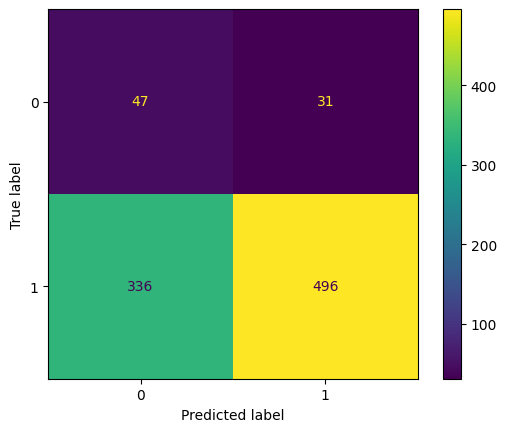

In [79]:
ConfusionMatrixDisplay.from_predictions(y_cls_test, y_pred_bal, display_labels=cls_bal.classes_)

### ??? We aim to optimize recall -> we want to identify 'unhappy' people as they might be depressed / socially disadvantaged
-> Recall measures how good our model is at correctly predicting positive classes.

In [80]:
print(classification_report(y_cls_test, y_pred_bal, target_names=["unhappy", "happy"]))

              precision    recall  f1-score   support

     unhappy       0.12      0.60      0.20        78
       happy       0.94      0.60      0.73       832

    accuracy                           0.60       910
   macro avg       0.53      0.60      0.47       910
weighted avg       0.87      0.60      0.68       910



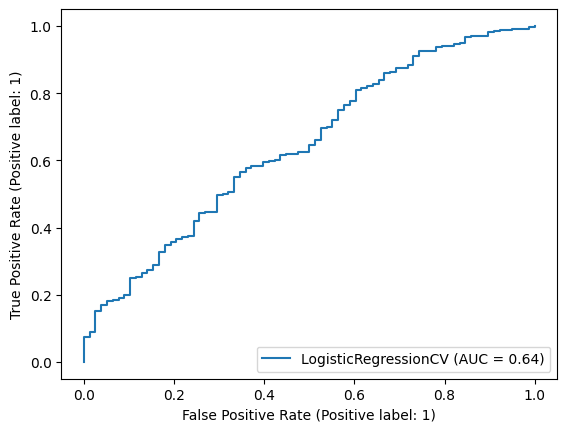

In [81]:
RocCurveDisplay.from_estimator(cls_bal, X_cls_test_dropped, y_cls_test)

#### Tresholds

In [82]:
def cls_tresholds(model, threshold, x_test, y_test):
    pred_proba = model.predict_proba(x_test)

    df = pd.DataFrame({"y_pred": pred_proba[:,1] > threshold})

    print(f"Logistic Regression with Threshold {threshold}")

    print(classification_report(y_test, df["y_pred"], target_names=["unhappy", "happy"]))

In [83]:
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

for x in thresholds:
    cls_tresholds(cls_bal, x, X_cls_test_dropped, y_cls_test)

Logistic Regression with Threshold 0.3
              precision    recall  f1-score   support

     unhappy       0.27      0.15      0.20        78
       happy       0.92      0.96      0.94       832

    accuracy                           0.89       910
   macro avg       0.60      0.56      0.57       910
weighted avg       0.87      0.89      0.88       910

Logistic Regression with Threshold 0.4
              precision    recall  f1-score   support

     unhappy       0.16      0.35      0.22        78
       happy       0.93      0.84      0.88       832

    accuracy                           0.79       910
   macro avg       0.55      0.59      0.55       910
weighted avg       0.87      0.79      0.82       910

Logistic Regression with Threshold 0.5
              precision    recall  f1-score   support

     unhappy       0.12      0.60      0.20        78
       happy       0.94      0.60      0.73       832

    accuracy                           0.60       910
   macro av

#### Select model - Unbalanced dataset

In [84]:
cls_unbal = LogisticRegressionCV(cv=10, random_state=12)
cls_unbal.fit(X_cls_train_dropped, y_cls_train)

LogisticRegressionCV(cv=10, random_state=12)

#### Training and Validation

#### Evaluation on test set

In [85]:
y_pred_unbal = cls_unbal.predict(X_cls_test_dropped)

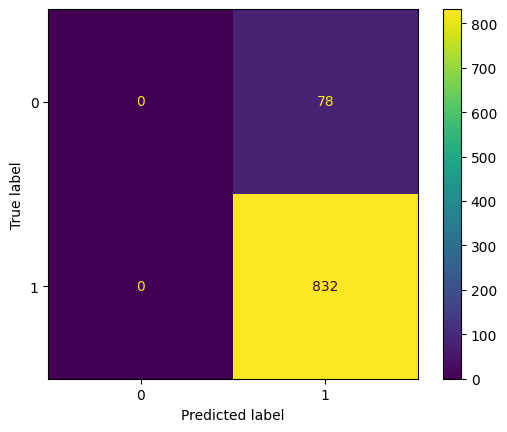

In [86]:
ConfusionMatrixDisplay.from_predictions(y_cls_test, y_pred_unbal, display_labels=cls_unbal.classes_)

In [87]:
print(classification_report(y_cls_test, y_pred_unbal, target_names=["unhappy", "happy"]))

              precision    recall  f1-score   support

     unhappy       0.00      0.00      0.00        78
       happy       0.91      1.00      0.96       832

    accuracy                           0.91       910
   macro avg       0.46      0.50      0.48       910
weighted avg       0.84      0.91      0.87       910



c:\Users\jeje1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jeje1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jeje1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

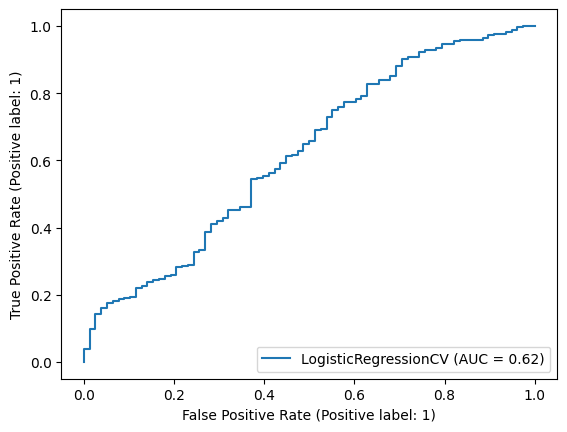

In [88]:
RocCurveDisplay.from_estimator(cls_unbal, X_cls_test_dropped, y_cls_test)

#### Save model



Save your model in the folder `models/`. Use a meaningful name and a timestamp.

### Regression

Linear Regression with every independent variable in `X_reg_filtered`: The model is linear regression. Model is fitted and is predicting. Afterwards the mse and the rmse are calculated.

In [89]:
model_reg = LinearRegression()
for column in X_reg_filtered.columns:
    model_reg.fit(X_reg_train[[column]], y_reg_train)

    y_pred = model_reg.predict(X_reg_test[[column]])
    mse_reg = mean_squared_error(y_reg_test, y_pred)
    rmse_reg = mean_squared_error(y_reg_test, y_pred, squared=False)

    print(f'Ergebnisse für {column}:')
    print(f'MSE: {mse_reg.round(2)}, RMSE: {rmse_reg.round(2)}')
    print("\n")

Ergebnisse für tvpol:
MSE: 13567704.1, RMSE: 3683.44


Ergebnisse für lrscale:
MSE: 13464901.24, RMSE: 3669.46


Ergebnisse für netuse:
MSE: 13239817.11, RMSE: 3638.66


Ergebnisse für tvtot:
MSE: 13332874.0, RMSE: 3651.42


Ergebnisse für nwsptot:
MSE: 13631603.93, RMSE: 3692.1


Ergebnisse für edude3:
MSE: 13516406.39, RMSE: 3676.47


Ergebnisse für edufde3:
MSE: 13537547.39, RMSE: 3679.34


Ergebnisse für edumde3:
MSE: 13520208.14, RMSE: 3676.98




Trying Lasso Regression

In [90]:
lasso = Lasso(alpha=0.1) 
lasso.fit(X_reg_train, y_reg_train)

y_reg_pred = lasso.predict(X_reg_test)

mse_l = mean_squared_error(y_reg_test, y_reg_pred)
rmse_l = mean_squared_error(y_reg_test, y_reg_pred, squared=False)
r2_l = r2_score(y_reg_test, y_reg_pred)
print(f'MSE: {mse_l.round(2)}, RMSE: {rmse_l.round(2)}, R^2: {r2_l.round(2)}')
print("\n")

MSE: 14454396.75, RMSE: 3801.89, R^2: -0.07




#### Select model

#### Training and validation

#### Fit model

#### Evaluation on test set

#### Save model

Save your model in the folder `models/`. Use a meaningful name and a timestamp.

## Conclusions